In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [58]:
df_results = pd.concat((pd.read_csv(f, index_col=0) for f in Path('data/sampling_methods_comparison').rglob('results.csv')), ignore_index=True)
df_results.iloc[:,6:] *= 1000
df_50 = df_results.groupby(list(df_results.columns[:6])).median().reset_index()
df_16 = df_results.groupby(list(df_results.columns[:6])).quantile(0.16).reset_index()
df_84 = df_results.groupby(list(df_results.columns[:6])).quantile(0.84).reset_index()
df_16.iloc[:,6:] = df_50.iloc[:,6:] - df_16.iloc[:,6:]
df_84.iloc[:,6:] = df_84.iloc[:,6:] - df_50.iloc[:,6:]
print(df_50.columns)

Index(['Subsample size', 'Energy Weight', '2Jmax', 'Train Precision',
       'Error Precision', 'Sampling Method', 'Subsampled Energy RMSE',
       'Subsampled Force RMSE', 'Training Energy RMSE', 'Training Force RMSE',
       'Testing Energy RMSE', 'Testing Force RMSE'],
      dtype='object')


In [59]:
df_random_50 = df_50[df_50['Sampling Method']=='Random']
df_random_16 = df_16[df_16['Sampling Method']=='Random']
df_random_84 = df_84[df_84['Sampling Method']=='Random']
df_lev_sampling_50 = df_50[df_50['Sampling Method']=='Leverage']
df_lev_sampling_16 = df_16[df_16['Sampling Method']=='Leverage']
df_lev_sampling_84 = df_84[df_84['Sampling Method']=='Leverage']
df_lev_block_sampling_50 = df_50[df_50['Sampling Method']=='Block Leverage']
df_lev_block_sampling_16 = df_16[df_16['Sampling Method']=='Block Leverage']
df_lev_block_sampling_84 = df_84[df_84['Sampling Method']=='Block Leverage']

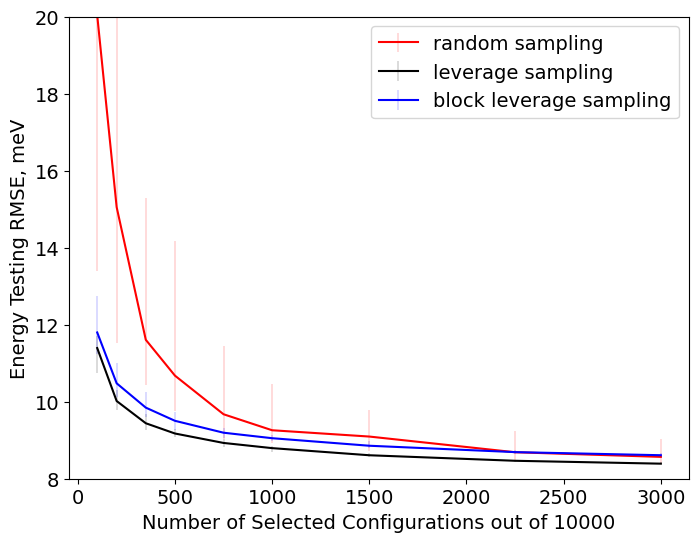

In [60]:
plt.figure(figsize=(8,6))
# plt.plot(low_df['# of Configurations'], low_df['High Precision MLIP'], 'k--', label='entire training set (10000)')
plt.errorbar(df_random_50['Subsample size'], df_random_50['Testing Energy RMSE'],
             yerr=np.vstack([df_random_16['Testing Energy RMSE'].values,df_random_84['Testing Energy RMSE'].values]),
             linestyle='-', c='r', label='random sampling', elinewidth=0.2)
plt.errorbar(df_lev_sampling_50['Subsample size'], df_lev_sampling_50['Testing Energy RMSE'],
             yerr=np.vstack([df_lev_sampling_16['Testing Energy RMSE'].values,df_lev_sampling_84['Testing Energy RMSE'].values]),
             fmt='-', c='k', label='leverage sampling', elinewidth=0.2)
plt.errorbar(df_lev_block_sampling_50['Subsample size'], df_lev_block_sampling_50['Testing Energy RMSE'],
             yerr=np.vstack([df_lev_block_sampling_16['Testing Energy RMSE'].values,df_lev_block_sampling_84['Testing Energy RMSE'].values]),
             fmt='-', c='b', label='block leverage sampling', elinewidth=0.2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Number of Selected Configurations out of 10000", fontsize=14)
plt.ylabel("Energy Testing RMSE, meV", fontsize=14)
plt.legend(fontsize=14)
plt.ylim(8,20)
plt.show()

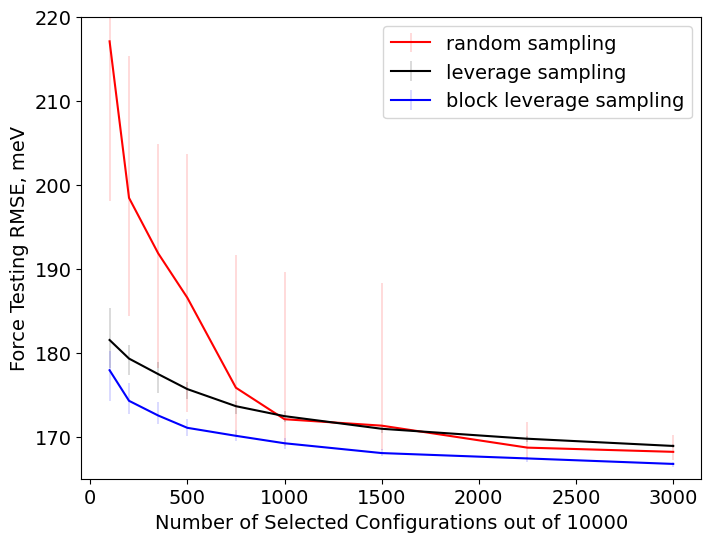

In [63]:
plt.figure(figsize=(8,6))
# plt.plot(low_df['# of Configurations'], low_df['High Precision MLIP'], 'k--', label='entire training set (10000)')
plt.errorbar(df_random_50['Subsample size'], df_random_50['Testing Force RMSE'],
             yerr=np.vstack([df_random_16['Testing Force RMSE'].values,df_random_84['Testing Force RMSE'].values]),
             linestyle='-', c='r', label='random sampling', elinewidth=0.2)
plt.errorbar(df_lev_sampling_50['Subsample size'], df_lev_sampling_50['Testing Force RMSE'],
             yerr=np.vstack([df_lev_sampling_16['Testing Force RMSE'].values,df_lev_sampling_84['Testing Force RMSE'].values]),
             fmt='-', c='k', label='leverage sampling', elinewidth=0.2)
plt.errorbar(df_lev_block_sampling_50['Subsample size'], df_lev_block_sampling_50['Testing Force RMSE'],
             yerr=np.vstack([df_lev_block_sampling_16['Testing Force RMSE'].values,df_lev_block_sampling_84['Testing Force RMSE'].values]),
             fmt='-', c='b', label='block leverage sampling', elinewidth=0.2)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Number of Selected Configurations out of 10000", fontsize=14)
plt.ylabel("Force Testing RMSE, meV", fontsize=14)
plt.legend(fontsize=14)
plt.ylim(165,220)
plt.show()